In [1]:
from sklearn.linear_model import LogisticRegression # NOT MUCH EFFECT
from sklearn.ensemble import RandomForestClassifier # NOT MUCH EFFECT 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd ; import numpy as np 
import seaborn as sns ; import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler,MaxAbsScaler
from seedtools import load_seed

# Standardization 

In [3]:
data = load_seed("Social_Network_Ads.csv").data
data = data.drop(columns=["User ID","Gender"])

Shape: [400, 4]
Columns: ['Gender', 'Age', 'EstimatedSalary', 'Purchased']
Description: DATA IS NOT YET PROVIDED


In [4]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
x_train,x_test,y_train,y_test =  train_test_split(data.drop("Purchased",axis=1),data["Purchased"],test_size=0.2)

In [6]:
x_train.shape,y_train.shape

((320, 2), (320,))

### Scaling Data 

In [7]:
ss =  StandardScaler()

In [8]:
x_train_ =  ss.fit_transform(x_train)
x_test_ =  ss.transform(x_test)

In [9]:
age_mean,salary_mean =  ss.mean_
print(f"age mean : {age_mean}")
print(f"Salary mean : {salary_mean}")

age mean : 37.58125
Salary mean : 69271.875


In [10]:
ss.var_

array([1.07868398e+02, 1.17457296e+09])

In [11]:
df =  pd.DataFrame({"Age":x_train_[:,0],"salaray":x_train_[:,1]})

In [12]:
df.head()

,Age,salaray
0,0.232886,0.254672
1,2.062277,-0.795747
2,-0.152249,2.180440
3,1.099440,0.546455
4,-1.500221,0.342207


In [13]:
x_train_.shape

(320, 2)

### Checking out distributions 

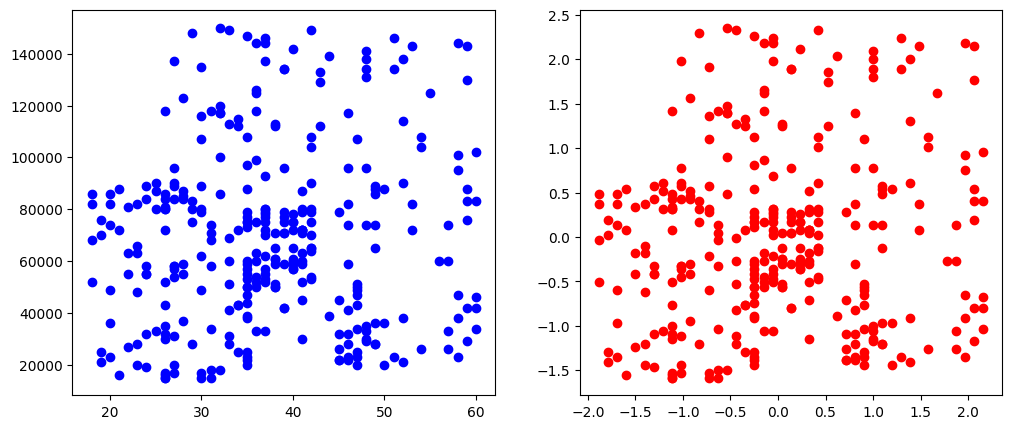

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train["Age"],x_train["EstimatedSalary"],color='blue') #row=0, col=0
ax2.scatter(df["Age"],df["salaray"],color='red') 

Text(0.5, 1.0, 'After Scaling ')

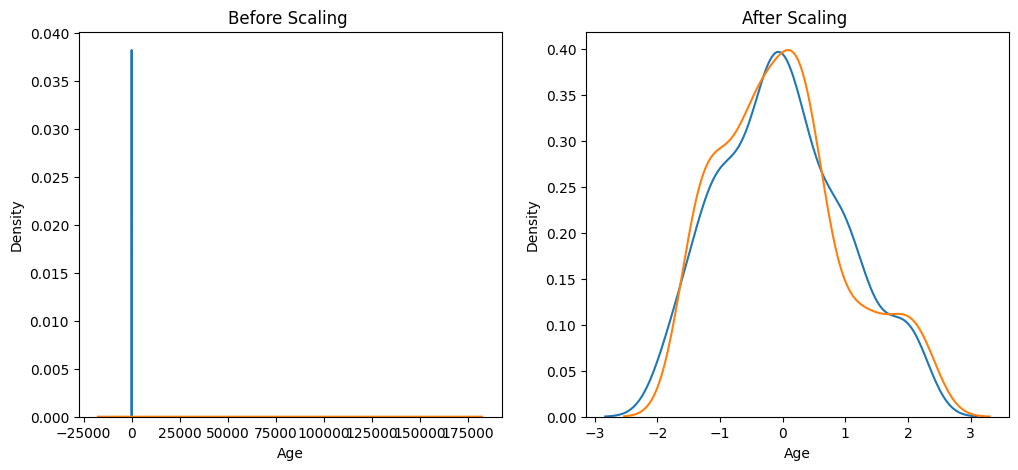

In [15]:
# probability density functions 
# feature constructed if compared togerther but 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.kdeplot(x_train["Age"],ax=ax1)
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1)
ax1.set_title("Before Scaling ")

sns.kdeplot(df["Age"],ax=ax2)
sns.kdeplot(df["salaray"],ax=ax2)
ax2.set_title("After Scaling ")

Text(0.5, 1.0, 'After Scaling ')

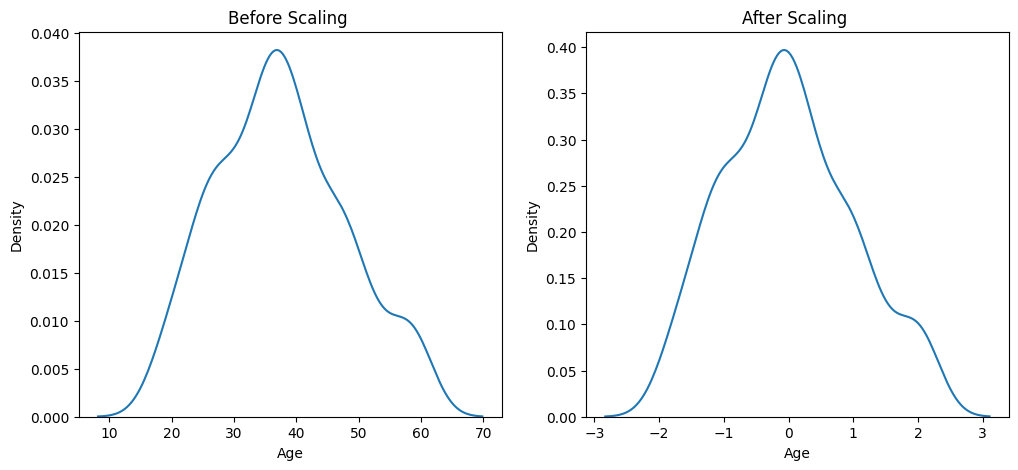

In [16]:
# density function of single column 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.kdeplot(x_train["Age"],ax=ax1)
ax1.set_title("Before Scaling ")

sns.kdeplot(df["Age"],ax=ax2)
ax2.set_title("After Scaling ")

Text(0.5, 1.0, 'After Scaling ')

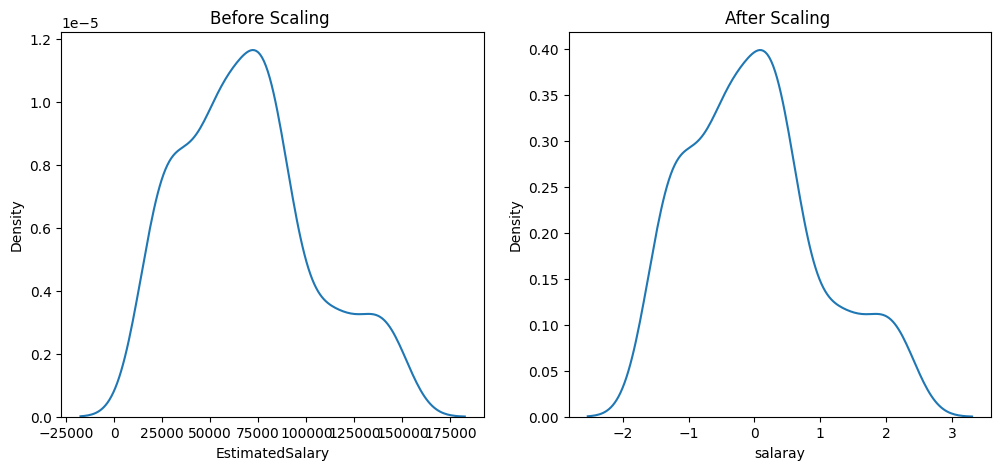

In [17]:
# density function of single column 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1)
ax1.set_title("Before Scaling ")

sns.kdeplot(df["salaray"],ax=ax2)
ax2.set_title("After Scaling ")

### testing models 

In [18]:
model =  KNeighborsClassifier()
model_sclaed =  KNeighborsClassifier()

In [19]:
model.fit(x_train,y_train)
model.score(x_test,y_test )

0.8375

In [20]:
model_sclaed.fit(x_train_,y_train)
model_sclaed.score(x_test_,y_test)

0.9375

# Normalization 

In [25]:
data = load_seed("wine_data.csv").data
data = data.iloc[:, [0, 1, 2]]
data.columns = ["target","alcohol","malic acid"]

Shape: [177, 14]
Columns: ['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28', '2.29', '5.64', '1.04', '3.92', '1065']
Description: Data Description is not yed provided


In [26]:
data.head()

,target,alcohol,malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


In [27]:
x_train,x_test,y_train,y_test =  train_test_split(data.drop(columns=["target"],axis=1),data.target,test_size=0.2,random_state=42)

Text(0.5, 1.0, 'Before Scaling')

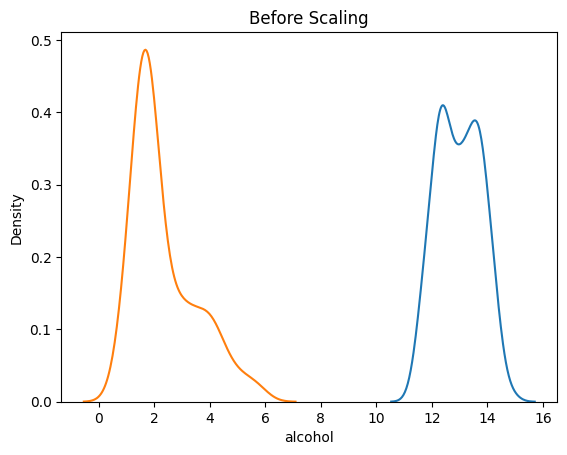

In [28]:
sns.kdeplot(x_train["alcohol"])
sns.kdeplot(x_train["malic acid"])
plt.title("Before Scaling")
## see how low the range is below Normalization 

In [29]:
data.target.unique()

array([1, 2, 3], dtype=int64)

<Axes: xlabel='malic acid', ylabel='alcohol'>

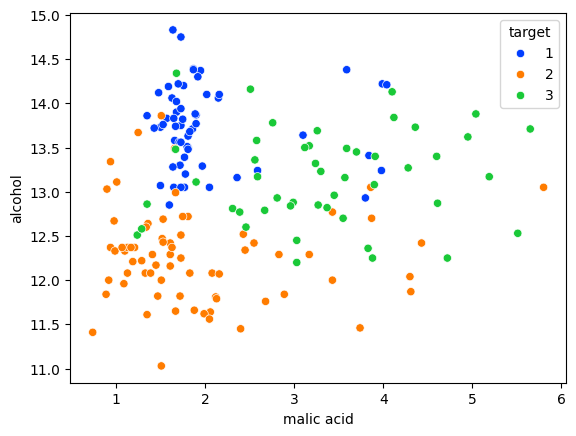

In [30]:
colors = {}
sns.scatterplot(data=data,x='malic acid',y='alcohol',hue='target',palette="bright")

##### MIN MAX SCALING 

In [31]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [32]:
x_train_1 = pd.DataFrame(min_max_scaler.transform(x_train),columns=x_train.columns)

x_test_1 = pd.DataFrame(min_max_scaler.transform(x_test),columns=x_test.columns)


Text(0.5, 1.0, 'Min Max Scaling ')

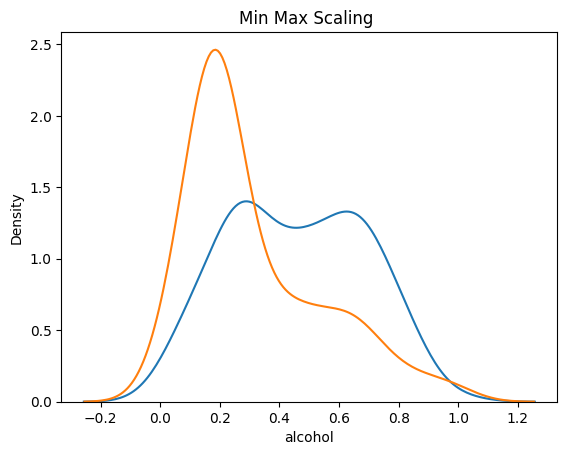

In [33]:
sns.kdeplot(x_train_1["alcohol"])
sns.kdeplot(x_train_1["malic acid"])
plt.title("Min Max Scaling ")

#### MAX ABS SCALING 

In [34]:
max_abs_scaler =  MaxAbsScaler()
max_abs_scaler.fit(x_train)

,copy,True


In [35]:
x_train_2 = pd.DataFrame(max_abs_scaler.transform(x_train),columns=x_train.columns)
x_test_2 = pd.DataFrame(max_abs_scaler.transform(x_test),columns=x_test.columns)


Text(0.5, 1.0, ' Max Abs Scaling ')

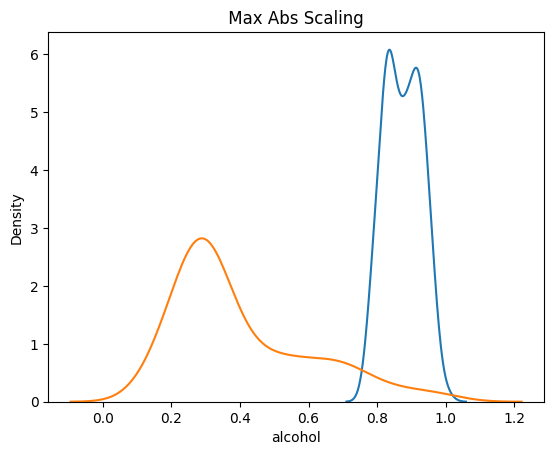

In [36]:
sns.kdeplot(x_train_2["alcohol"])
sns.kdeplot(x_train_2["malic acid"])
plt.title(" Max Abs Scaling ")

#### ROBUST SCALING

In [37]:
robust_scaler =  RobustScaler()
robust_scaler.fit(x_train)

,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False


In [38]:
x_train_3 =  pd.DataFrame(robust_scaler.transform(x_train),columns=x_train.columns)
x_test_3 =  pd.DataFrame(robust_scaler.transform(x_test),columns=x_test.columns)

Text(0.5, 1.0, 'Robust  Scaling ')

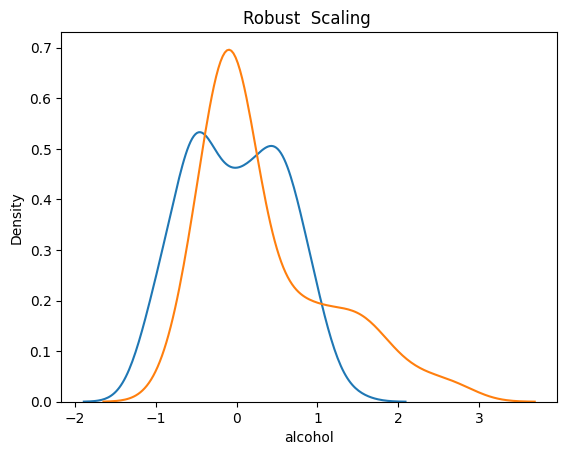

In [39]:
sns.kdeplot(x_train_3["alcohol"])
sns.kdeplot(x_train_3["malic acid"])
plt.title("Robust  Scaling ")

##### Logistic Regression

In [40]:
LogisticRegression().fit(x_train,y_train).score(x_test,y_test)

0.7777777777777778

In [41]:
LogisticRegression().fit(x_train_1,y_train).score(x_test_1,y_test)

0.7222222222222222

In [42]:
LogisticRegression().fit(x_train_2,y_train).score(x_test_2,y_test)

0.5277777777777778

In [43]:
LogisticRegression().fit(x_train_3,y_train).score(x_test_3,y_test)

0.75

##### Max abs scaling performing shitty 

##### RandomForestClassifier 

In [44]:
RandomForestClassifier().fit(x_train,y_train).score(x_test,y_test)

0.8888888888888888

In [45]:
RandomForestClassifier().fit(x_train_1,y_train).score(x_test_1,y_test)

0.8333333333333334

In [46]:
RandomForestClassifier().fit(x_train_2,y_train).score(x_test_2,y_test)

0.8888888888888888

In [47]:
RandomForestClassifier().fit(x_train_3,y_train).score(x_test_3,y_test)

0.8611111111111112

##### KNeighbors

In [48]:
KNeighborsClassifier().fit(x_train,y_train).score(x_test,y_test)

0.75

In [49]:
KNeighborsClassifier().fit(x_train_1,y_train).score(x_test_1,y_test)

0.75

In [50]:
KNeighborsClassifier().fit(x_train_2,y_train).score(x_test_2,y_test)

0.75

In [51]:
KNeighborsClassifier().fit(x_train_3,y_train).score(x_test_3,y_test)

0.7222222222222222